## ML-1 Keşifçi Veri Analizi
İlk adım olarak penguins veri setimizi csv formatında alalım. Bunun için pandas kullanacağım.

In [ ]:
#Gerekli kütüphane yüklemeleri
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
penguins_path = "/content/drive/MyDrive/ml/DATASET/penguins.csv"
df = pd.read_csv(penguins_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Veri Yükleme ve Keşfetme
Öncelikle csv dosyamızı df formatında çektikten sonra keşifçi veri analizine başlayabiliriz ilk önce veri setimizi incelemk için head fonksiyonunu çağıralım.


In [ ]:
df.head(10)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [ ]:
# Veri setinin temel istatistiklerini görüntüleyelim
df.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
df.shape

(344, 9)

In [ ]:
df.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

Veri setimizi incelediğimizde 9 sütundan(özellik)ten oluşan ve 344 satırdan oluşan bir veri setimiz olduğunu, penguenlerin türlerini, bulundukları adayı, gagalarının uzunluğunu genişliğini, kanatlarının uzunluğunu genişliğini(mm cinsinden) vücut ağırlıklarını, cinsiyetlerini ve doğum yıllarını bu ceri setinden gözlemleyebildiğimizi görüyoruz.

In [ ]:
df.isnull().sum()

,0
id,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


Null value var mı diye baktığımız zaman da gaga uzunluk ve genişliği özelliklerinde cinsiyette ve kanat uzunluğunda eksik verilerimiz olduğunu gözlemliyoruz.

In [ ]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].median())#boş değerleri median ile doldur
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].median())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].median())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].median())
df["sex"]= df["sex"].fillna("Unknown") #kategorik değişkenlerdeki boşlukları unknown ile doldur

Eksik değerlerimizi sayısal olanları median ile kategorik olan sex değişkenini "unknown" ile doldurduk.

In [ ]:
df.isnull().sum()

,0
id,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


Eksik değerleri doldurduktan sonra verimize baktığımızda artık hiç eksik değerimiz kalmadığını gözlemleyebiliyoruz.

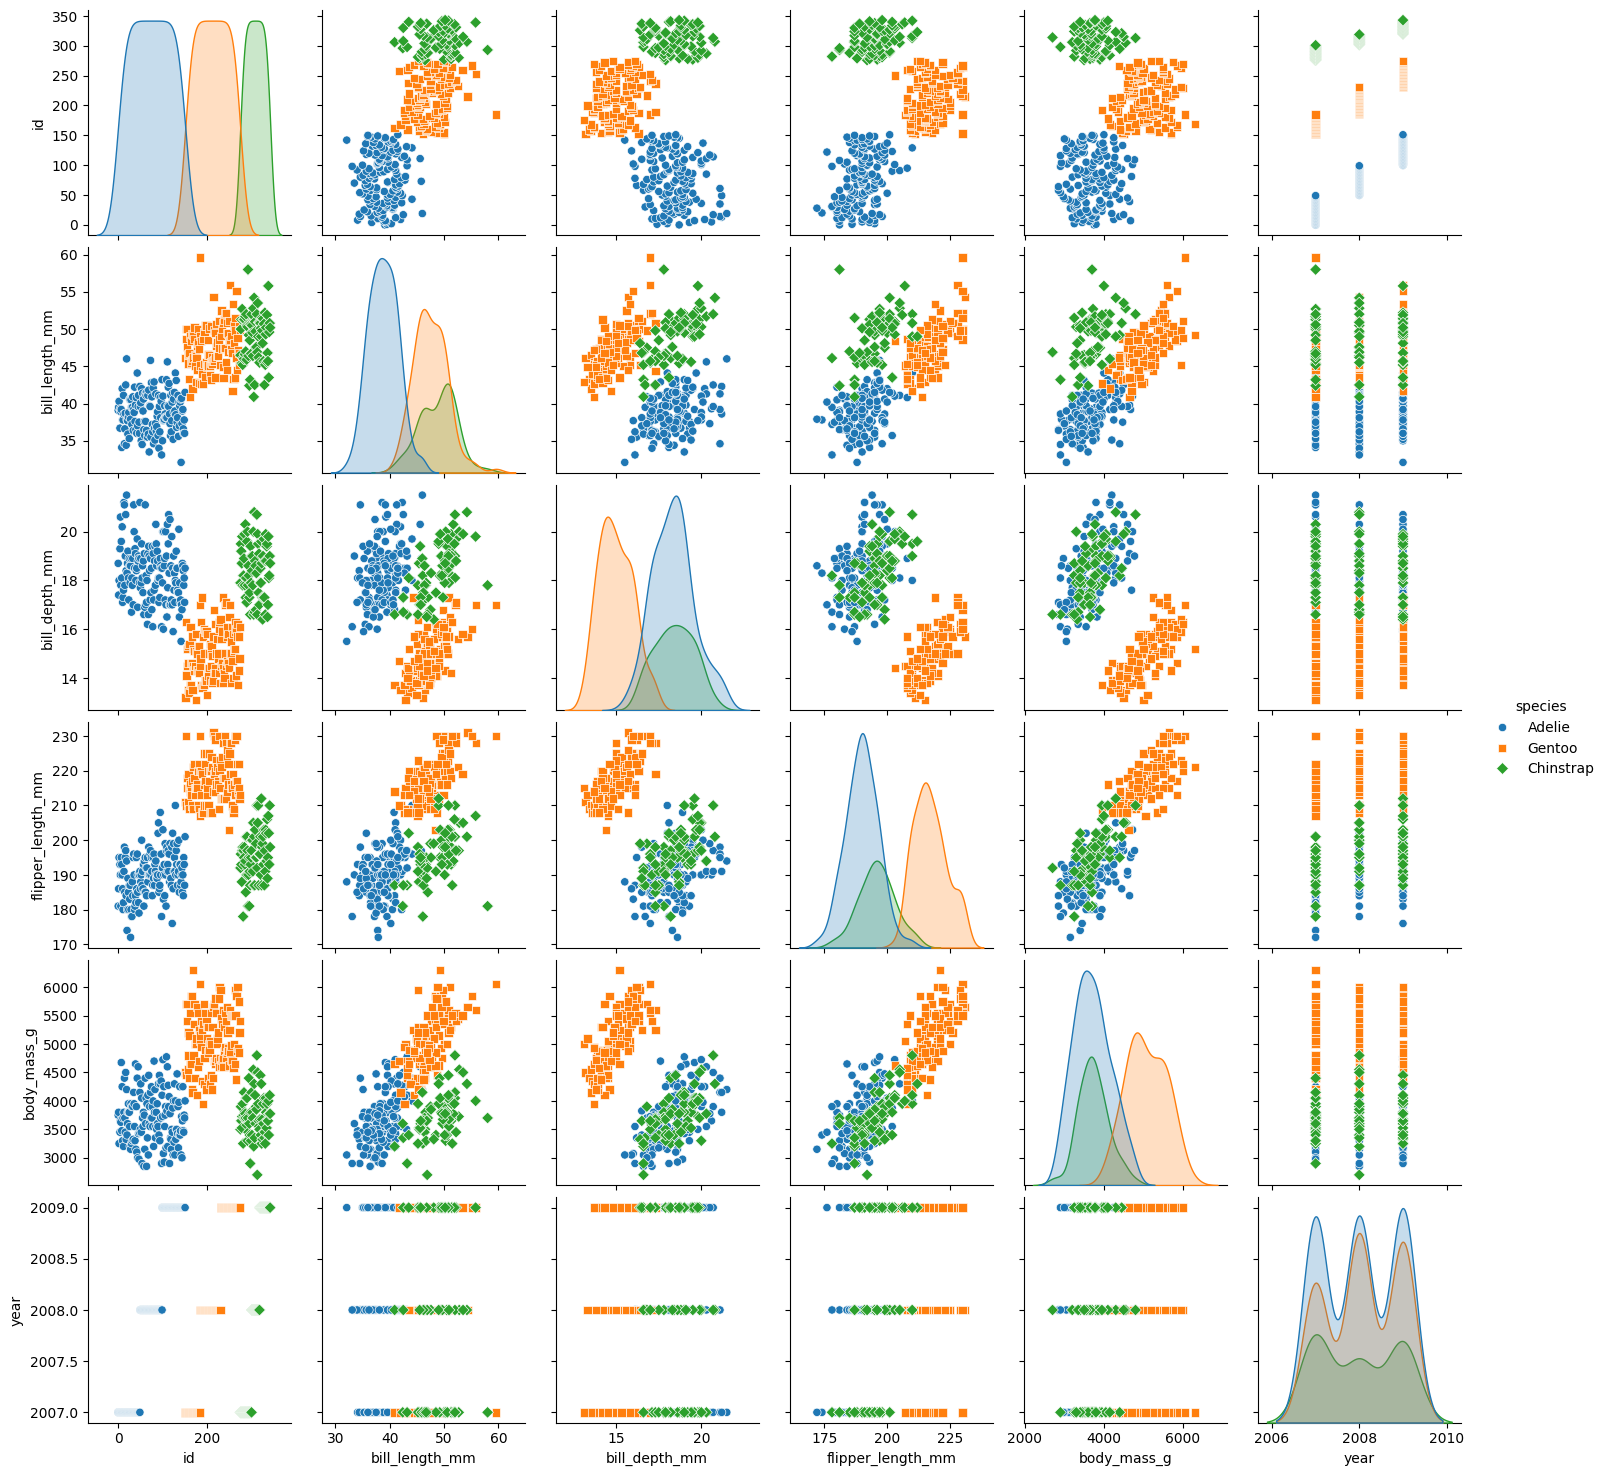

In [ ]:
# Penguen türlerine göre özellik dağılımı
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()


In [ ]:
# Eksik değerlerin toplam sayısını hesaplayalım
missing_values = df.isnull().sum()

# Eksik değerlerin yüzde kaçını oluşturduğunu hesaplayalım
missing_percentage = (missing_values / len(df)) * 100

# Eksik değer tablosunu oluşturalım
missing_table = pd.DataFrame({
    'Eksik Değer Sayısı': missing_values,
    'Eksik Değer Yüzdesi (%)': missing_percentage.round(2)
})

# Eksik değeri olan sütunları filtreleyelim (sadece eksik değeri olanları göster)
missing_table = missing_table[missing_table['Eksik Değer Sayısı'] > 0]

# Sonucu görüntüleyelim
missing_table


,Eksik Değer Sayısı,Eksik Değer Yüzdesi (%)
bill_length_mm,2,0.58
bill_depth_mm,2,0.58
flipper_length_mm,2,0.58
body_mass_g,2,0.58
sex,11,3.20


eksik değerlerin veri setinde yüzdelik olarak ne kadar yer kapladığını inceleyen fonksiyonumuzu çalıştırdıktan sonra bu değerlerin oldukça küçük olduğunu görüyoruz. Oldukça düşük oldukları için bu değerleri silmeyeceğiz. Bu eksik değerleri özelliklerin median değerleriyle doldurabiliriz.

## Fonksiyonlaştırma

Yaptığımız bütün işlemleri tek bir fonksiyonda toplayalım

In [ ]:
def check_df(df, head=10):
    """
    Bir DataFrame hakkında genel bilgi verir.

    Parametreler:
    df (pd.DataFrame): Analiz edilecek veri çerçevesi.
    head (int, opsiyonel): Kaç satır görüntüleneceği (varsayılan: ).

    Çıktılar:
    - İlk head kadar satır
    - Boyut bilgisi
    - Veri tipleri
    - Eksik değer analizi
    - Temel istatistikler
    """

    print("📌İlk Satırlar:")
    display(df.head(head))
    print("----------------------------------------------------------")

    print("📌 Veri Seti Boyutu:")
    display(f"Satır Sayısı: {df.shape[0]}, Sütun Sayısı: {df.shape[1]}\n")
    print("----------------------------------------------------------")
    print("📌 Veri Türleri:")
    display(df.dtypes)
    print("----------------------------------------------------------")
    print("📌 Eksik Değer Analizi:")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_table = pd.DataFrame({
        'Eksik Değer Sayısı': missing_values,
        'Eksik Değer Yüzdesi (%)': missing_percentage.round(2)
    })
    missing_table = missing_table[missing_table["Eksik Değer Sayısı"] > 0]

    if missing_table.empty:
        display("Eksik veri bulunmamaktadır.\n")
    else:
        display(missing_table)
    print("----------------------------------------------------------")
    print("📌 Temel İstatistikler:")
    display(df.describe().T)

In [ ]:
check_df(df)

📌İlk Satırlar:


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


----------------------------------------------------------
📌 Veri Seti Boyutu:


'Satır Sayısı: 344, Sütun Sayısı: 9\n'

----------------------------------------------------------
📌 Veri Türleri:


,0
id,int64
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


----------------------------------------------------------
📌 Eksik Değer Analizi:


,Eksik Değer Sayısı,Eksik Değer Yüzdesi (%)
bill_length_mm,2,0.58
bill_depth_mm,2,0.58
flipper_length_mm,2,0.58
body_mass_g,2,0.58
sex,11,3.20


----------------------------------------------------------
📌 Temel İstatistikler:


,count,mean,std,min,25%,50%,75%,max
id,344.0,171.500000,99.448479,0.0,85.750,171.50,257.25,343.0
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.00,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.00,2009.0


##Sayısal ve Kategorik Sütunları Ayırma


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
numerical_cols

Index(['id', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'year'],
      dtype='object')

Dtype'ına bakarak numerik olan özellikleri(sütunları) ayırdık

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
categorical_cols

Index(['species', 'island', 'sex'], dtype='object')

Ayni şekilde dtype'ına bakarak kategorik olan sütunları ayırdık.

In [ ]:
# Sonuçları yazdıralım
print("📌 Sayısal Değişkenler:")
print(numerical_cols)

print("\n📌 Kategorik Değişkenler:")
print(categorical_cols)

📌 Sayısal Değişkenler:
Index(['id', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'year'],
      dtype='object')

📌 Kategorik Değişkenler:
Index(['species', 'island', 'sex'], dtype='object')


##Sütun Silme
 -Bu bölümde uygulayacağımız makine öğrenmesinde işimize yaramayacak, işlemlerin maliyetini arttıracak gereksiz sütunları sileceğiz.

In [ ]:
df = df.drop(columns=["year", "id"]) #year ve id değişkenlerini siler

Year ve id değişkenlerini silmeye karar verdim çünkü doğum yılları ve veri setindeki id değerleri prediction yaparken çok etkili olmaz. Makine öğrenmesi modelimizi yavaşlatmalarına gerek yok. Bill length, bill depth ve flipper değerleri tür belirlemede özellikle oldukça büyük değer taşıyorlar onların kesinlikle verimizde kalması gerekiyor. Tabi ki body mass değeri de çok belirleyici bir etken olabilir bazı türlerin yaklaşık olarak body mass değerleri vardır ve bununla bağlantılı olarak sex değerini de tuttum çünkü cinsiyet ve body mass değerlerini beraber ele alarak tür predict etmede daha başarılı olabiliriz. Mesela Adelie türündeki penguenlerin dişileri 30-40 kg aralığında erkekleri 35-45 kg aralığında olabilir. Bu sebeple bu değişkeni de tutmaya karar verdim.